In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

In [2]:
(train, test), info = tfds.load(
    name='yelp_polarity_reviews',
    split=['train[:20000]', 'test[:2000]'],
    as_supervised=True,
    with_info=True
)

In [ ]:
info

In [3]:
train_text = np.array([x.numpy().decode('utf8') for x, y in train])
test_text = np.array([x.numpy().decode('utf8') for x, y in test])

In [4]:
train_labels = np.array([int(y) for x, y in train])
test_labels = np.array([int(y) for x, y in test])

In [5]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(train_text)

In [6]:
train_sequences = tokenizer.texts_to_sequences(train_text)
test_sequences = tokenizer.texts_to_sequences(test_text)

In [7]:
train_padded = tf.keras.utils.pad_sequences(train_sequences, maxlen=100)
test_padded = tf.keras.utils.pad_sequences(test_sequences, maxlen=100)

In [8]:
train_padded.shape

(20000, 100)

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 32),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 32)                1056      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 329,409
Trainable params: 329,409
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [12]:
history = model.fit(train_padded, train_labels, epochs=10, validation_data=(test_padded, test_labels))

Epoch 1/10
625/625 [==============================] - 32s 46ms/step - loss: 0.3662 - accuracy: 0.8320 - val_loss: 0.2555 - val_accuracy: 0.8965
Epoch 2/10
625/625 [==============================] - 28s 45ms/step - loss: 0.1937 - accuracy: 0.9272 - val_loss: 0.2463 - val_accuracy: 0.9065
Epoch 3/10
625/625 [==============================] - 27s 44ms/step - loss: 0.1401 - accuracy: 0.9489 - val_loss: 0.2847 - val_accuracy: 0.8970
Epoch 4/10
625/625 [==============================] - 28s 45ms/step - loss: 0.1089 - accuracy: 0.9613 - val_loss: 0.3613 - val_accuracy: 0.8945
Epoch 5/10
625/625 [==============================] - 28s 44ms/step - loss: 0.0820 - accuracy: 0.9716 - val_loss: 0.3175 - val_accuracy: 0.8915
Epoch 6/10
625/625 [==============================] - 28s 45ms/step - loss: 0.0640 - accuracy: 0.9776 - val_loss: 0.4307 - val_accuracy: 0.8845
Epoch 7/10
625/625 [==============================] - 29s 46ms/step - loss: 0.0529 - accuracy: 0.9826 - val_loss: 0.4104 - val_accuracy:

In [13]:
def graph(train_data, test_data, label):
    plt.plot(train_data, label=f'train {label}')
    plt.plot(test_data, label=f'test {label}')
    plt.title(f'Training & Validation {label}')
    plt.xlabel('epoch')
    plt.ylabel('value')
    plt.grid()
    plt.legend()
    plt.show()

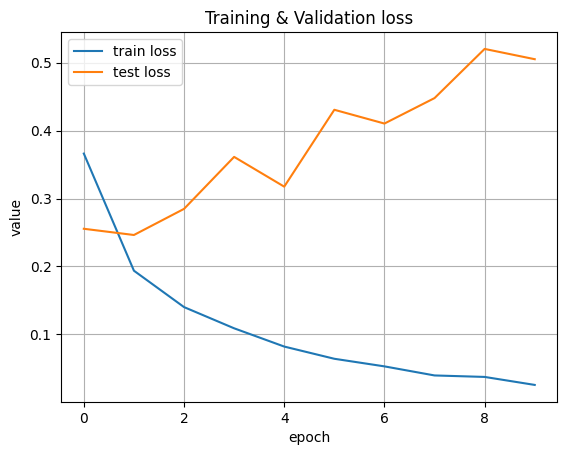

In [14]:
graph(history.history['loss'], history.history['val_loss'], 'loss')

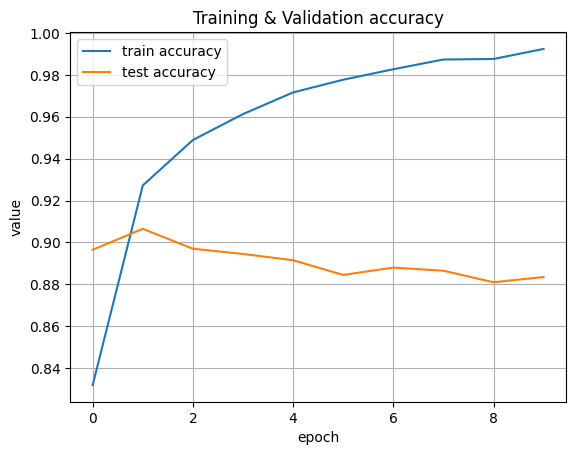

In [15]:
graph(history.history['accuracy'], history.history['val_accuracy'], 'accuracy')